In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
data = pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
data.shape

(918, 12)

In [5]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<AxesSubplot:>

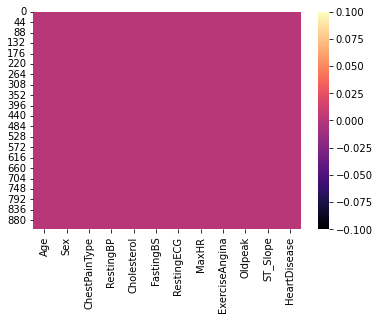

In [7]:
sb.heatmap(data.isnull(),cmap = 'magma',cbar = True)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


#### Mean values of all the features for cases of heart diseases and non-heart diseases.

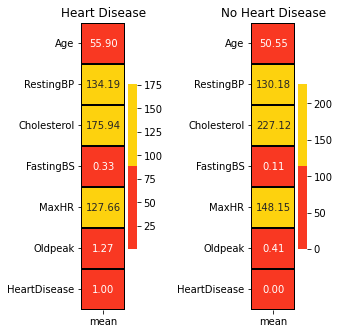

In [9]:
Have_Heart_Disease = data[data['HeartDisease'] == 1].describe().T
No_Heart_Disease = data[data['HeartDisease'] == 0].describe().T
colors = ['#F93822','#FDD20E']
fig,ax = plt.subplots(nrows = 1, ncols = 2, figsize = (5,5))


plt.subplot(1,2,1)
sb.heatmap(Have_Heart_Disease[['mean']], annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black', cbar = True, fmt = '.2f',)
plt.title('Heart Disease')

plt.subplot(1,2,2)
sb.heatmap(No_Heart_Disease[['mean']], annot = True, cmap = colors, linewidths = 0.4, linecolor = 'black', cbar = True, fmt = '.2f',)
plt.title('No Heart Disease')

fig.tight_layout(pad = 2)

In [10]:
col = list(data.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(data[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)
print('Categorical Features : ', *categorical_features)
print('Numerical Features : ', *numerical_features)

Categorical Features :  Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features :  Age RestingBP Cholesterol MaxHR Oldpeak


In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = data.copy(deep = True)

df['Sex'] = le.fit_transform(df['Sex'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])
df['ST_Slope'] = le.fit_transform(df['ST_Slope'])

C:\Users\Saket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarnin

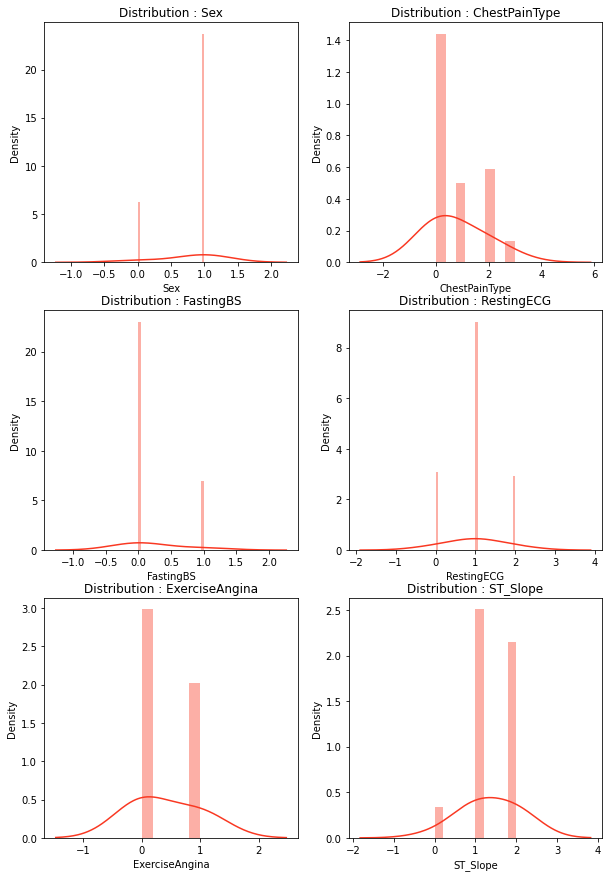

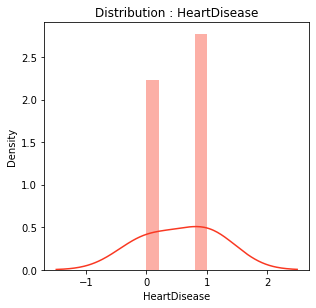

In [12]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    
    plt.subplot(3,2,i+1)
    sb.distplot(df[categorical_features[i]],kde_kws = {'bw' : 1},color = colors[0]);
    title = 'Distribution : ' + categorical_features[i]
    plt.title(title)
    
plt.figure(figsize = (4.75,4.55))
sb.distplot(df[categorical_features[len(categorical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + categorical_features[len(categorical_features) - 1]
plt.title(title);

C:\Users\Saket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

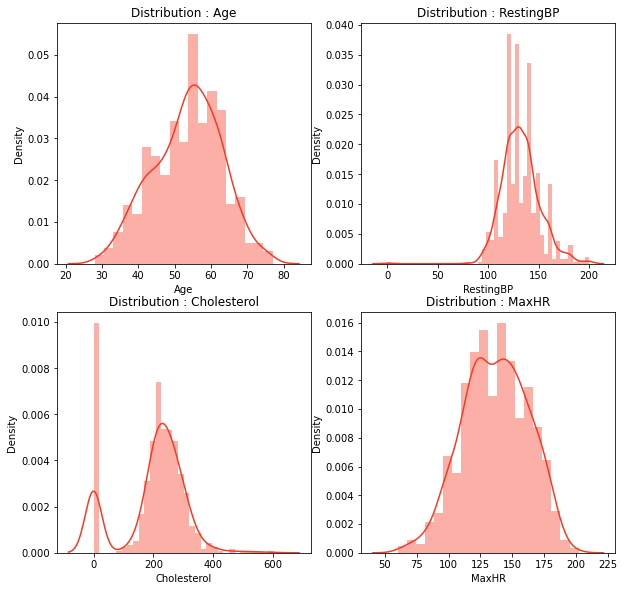

C:\Users\Saket\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)


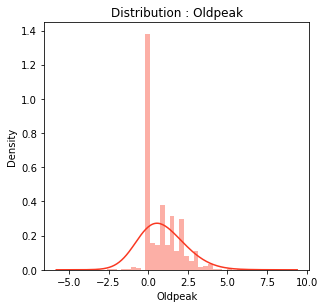

In [13]:
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sb.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sb.distplot(df[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


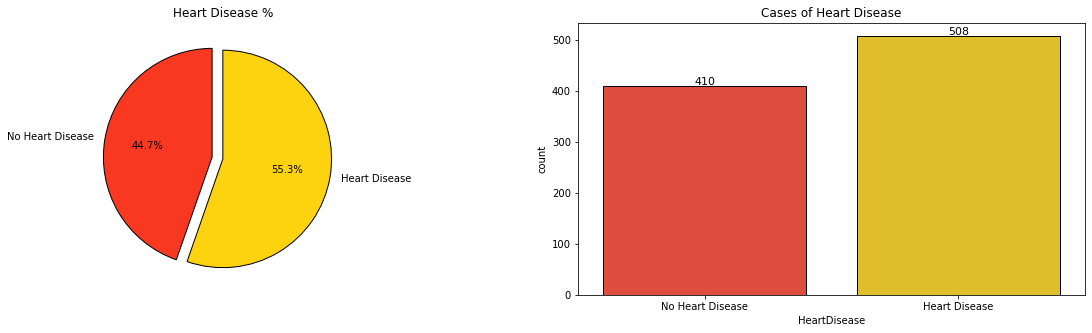

In [14]:
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100,l[0] / sum(l) * 100]

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (20,5))
plt.subplot(1,2,1)
plt.pie(circle,labels = ['No Heart Disease','Heart Disease'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Heart Disease %');

plt.subplot(1,2,2)
ax = sb.countplot('HeartDisease',data = data,palette = colors,edgecolor = 'black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
ax.set_xticklabels(['No Heart Disease','Heart Disease'])
plt.title('Cases of Heart Disease');
plt.show()

C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saket\anaconda3\lib\si

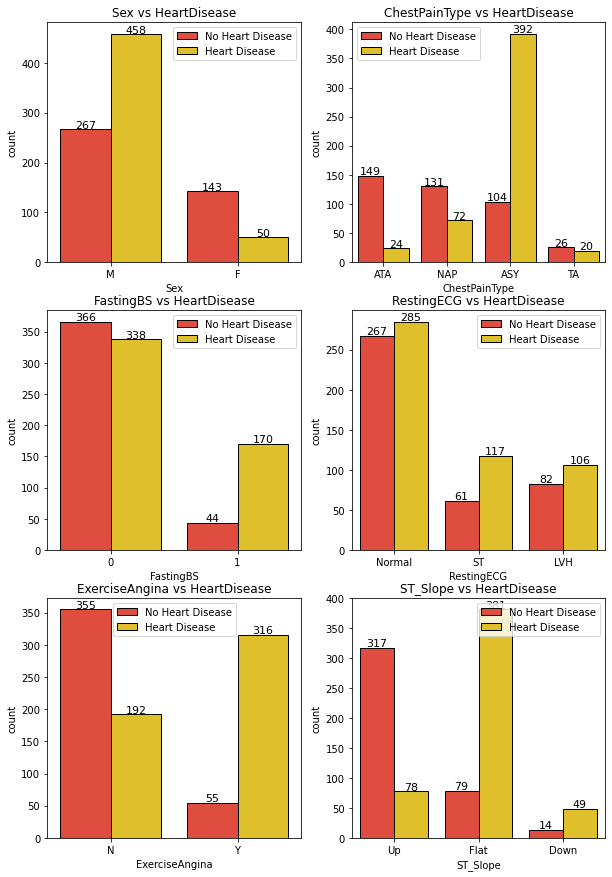

In [15]:
fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (10,15))
for i in range(len(categorical_features) - 1):
    plt.subplot(3,2,i+1)
    ax = sb.countplot(categorical_features[i],data = data,hue = "HeartDisease",palette = colors,edgecolor = 'black')
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

In [16]:
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100, cp[1] / sum(cp) * 100, cp[2] / sum(cp) * 100, cp[3] / sum(cp) * 100]

fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100, fbs[1] / sum(fbs) * 100]

restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

ea = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
recg = [ea[0] / sum(ea) * 100, ea[1] / sum(ea) * 100]

slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100, slope[1] / sum(slope) * 100, slope[2] / sum(slope) * 100]

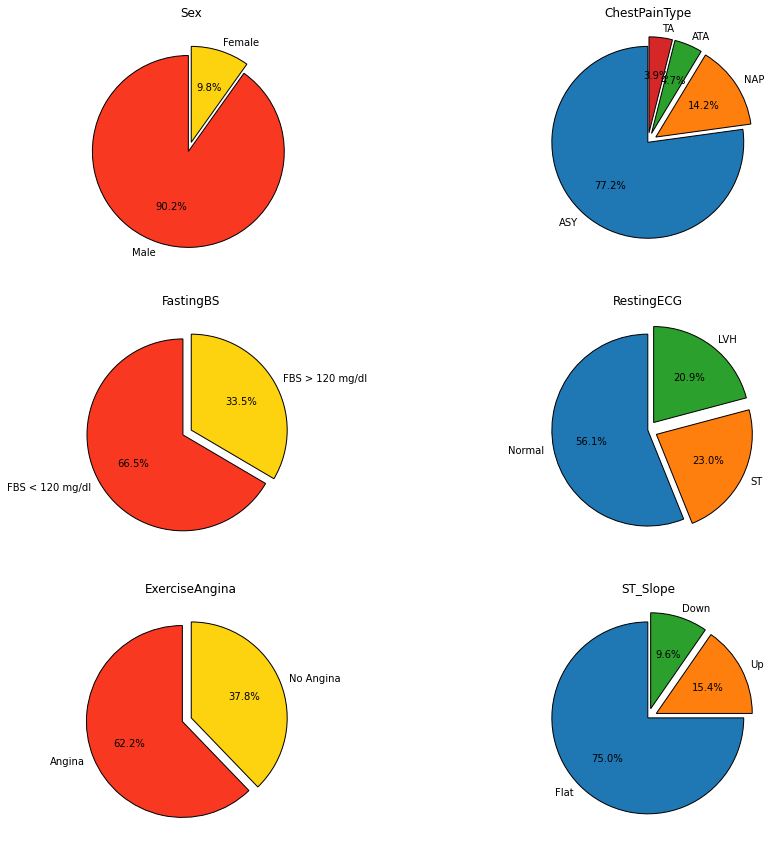

In [17]:
ax,fig = plt.subplots(nrows = 4,ncols = 2,figsize = (15,15))

plt.subplot(3,2,1)
plt.pie(sex,labels = ['Male','Female'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Sex');

plt.subplot(3,2,2)
plt.pie(cp,labels = ['ASY', 'NAP', 'ATA', 'TA'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ChestPainType');

plt.subplot(3,2,3)
plt.pie(fbs,labels = ['FBS < 120 mg/dl','FBS > 120 mg/dl'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('FastingBS');

plt.subplot(3,2,4)
plt.pie(restecg,labels = ['Normal','ST','LVH'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('RestingECG');

plt.subplot(3,2,5)
plt.pie(ea,labels = ['Angina','No Angina'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ExerciseAngina');

plt.subplot(3,2,6)
plt.pie(slope,labels = ['Flat','Up','Down'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1,0.1),
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('ST_Slope');

#### Out of all the heart disease patients, a staggering 90% patients are male.
#### When it comes to the type of chest pain, ASY type holds the majority with 77% that lead to heart diseases.
#### Fasting Blood Sugar level < 120 mg/dl displays high chances of heart diseases.
#### For RestingECG, Normal level accounts for 56% chances of heart diseases than LVH and ST levels.
#### Detection of Exercise Induced Angina also points towards heart diseases.
#### When it comes to ST_Slope readings, Flat level holds a massive chunk with 75% that may assist in detecting underlying heart problems.

C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saket\anaconda3\lib\si

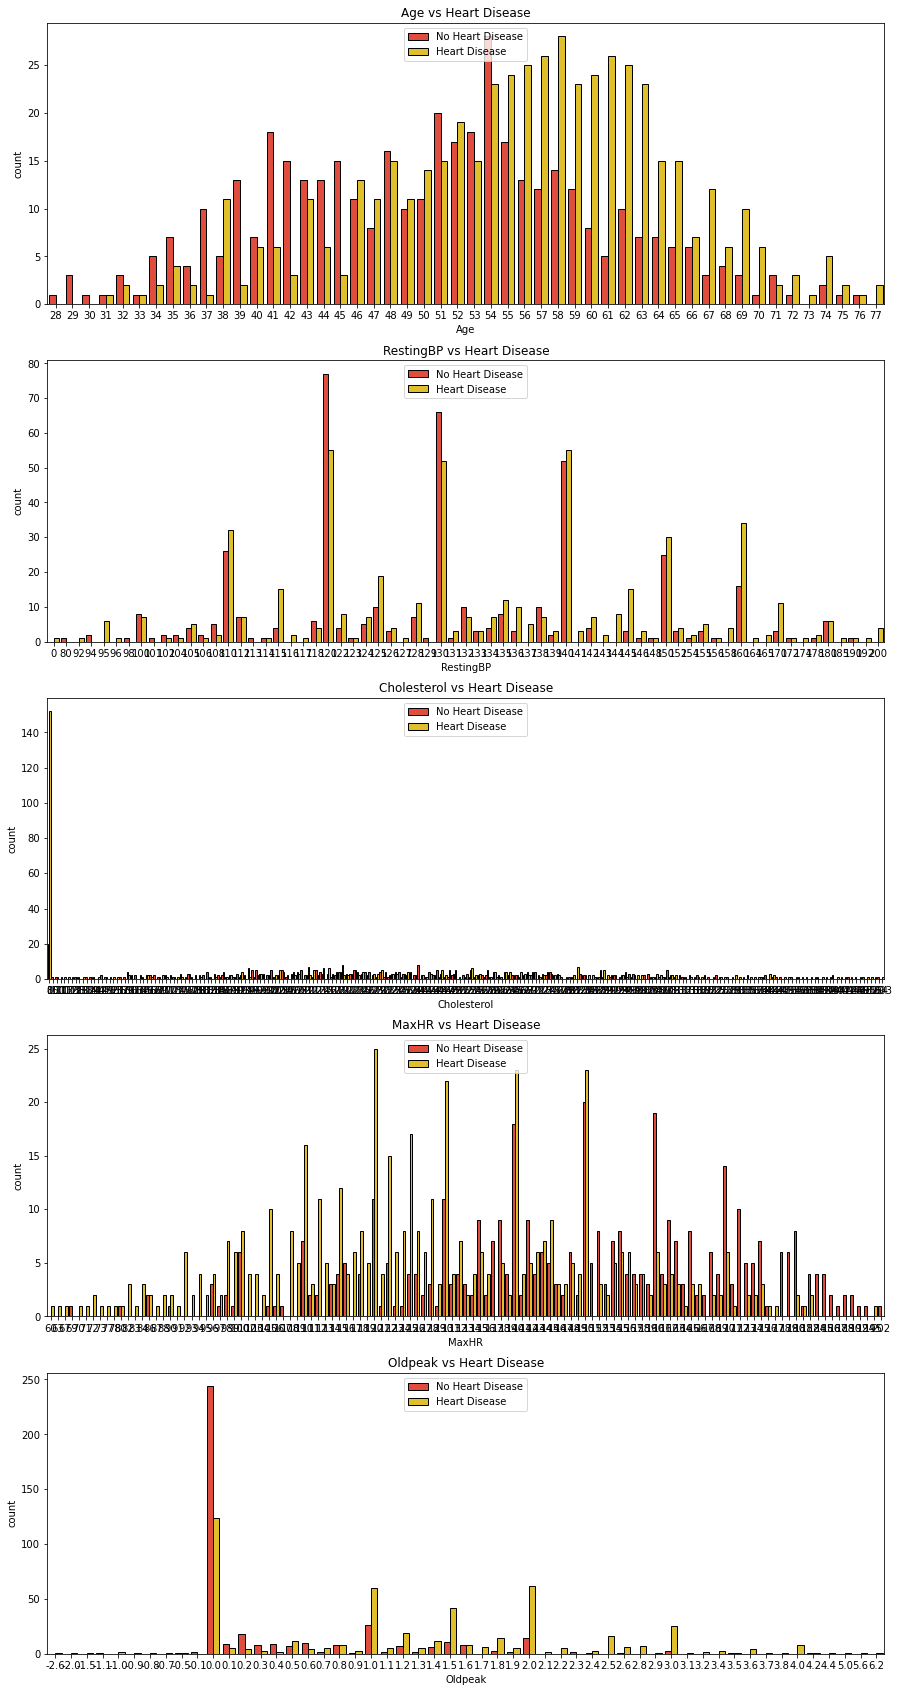

In [18]:
fig, ax = plt.subplots(nrows = 5,ncols = 1,figsize = (15,30))
for i in range(len(numerical_features)):
    plt.subplot(5,1,i+1)
    sb.countplot(numerical_features[i],data = data,hue = "HeartDisease",palette = colors, edgecolor = 'black')
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease','Heart Disease'])
    plt.title(title);

In [19]:
data['RestingBP_Group'] = [ int(i / 5) for i in data['RestingBP']]
data['Cholesterol_Group'] = [ int(i / 10) for i in data['Cholesterol']]
data['MaxHR_Group'] = [ int(i / 5) for i in data['MaxHR']]
data['Oldpeak_Group'] = [ int( (i*10) / 5) for i in data['Oldpeak']]

C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saket\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saket\anaconda3\lib\si

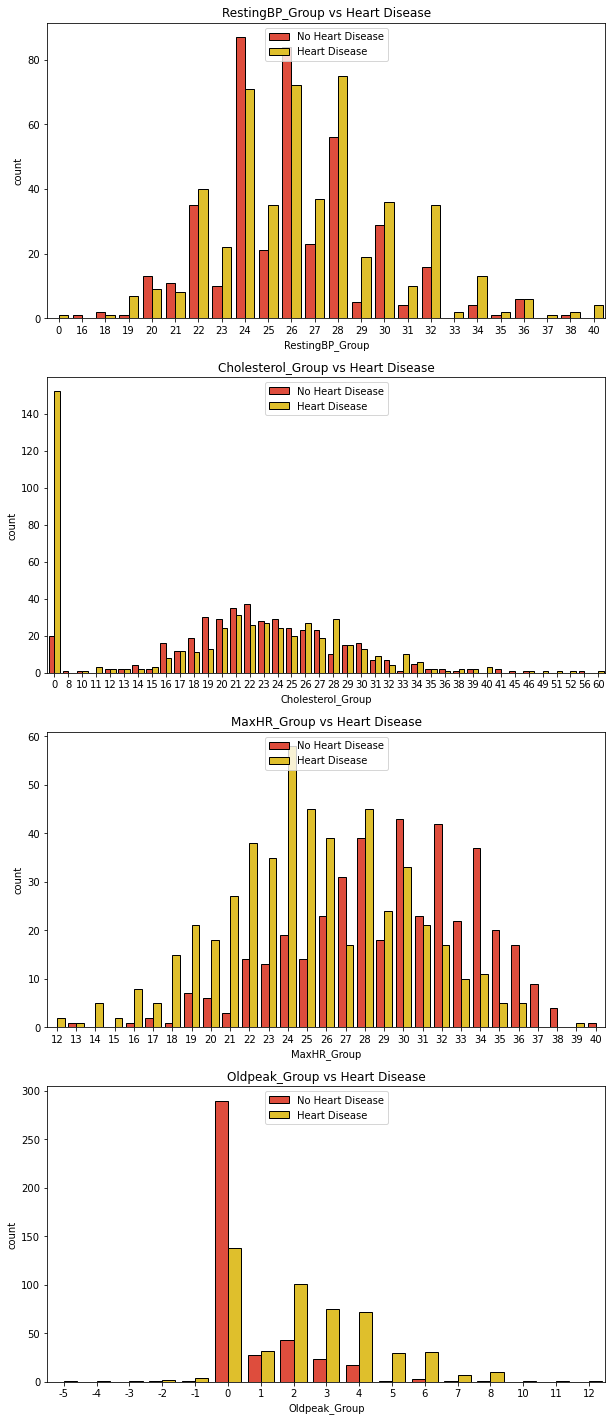

In [20]:
fig, ax = plt.subplots(nrows = 4,ncols = 1,figsize = (10,25))
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]
for i in range(len(group_numerical_features)):
    plt.subplot(4,1,i+1)
    sb.countplot(group_numerical_features[i],data = data,hue = "HeartDisease",palette = colors, edgecolor = 'black')
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title);

##### From the RestingBP group data, 95 (19x5) - 170 (34x5) readings are most prone to be detected with heart diseases.
##### Cholesterol levels between 160 (16x10) - 340 (34x10) are highly susceptible to heart diseases.
##### For the MaxHR readings, heart diseases are found throughout the data but 70 (14x5) - 180 (36x5) values has detected many cases.
##### Oldpeak values also display heart diseases throughout. 0 (0x5/10) - 4 (8x5/10) slope values display high probability to be diagnosed with heart diseases.

### Numerical features vs Categorical features w.r.t Target variable(HeartDisease)

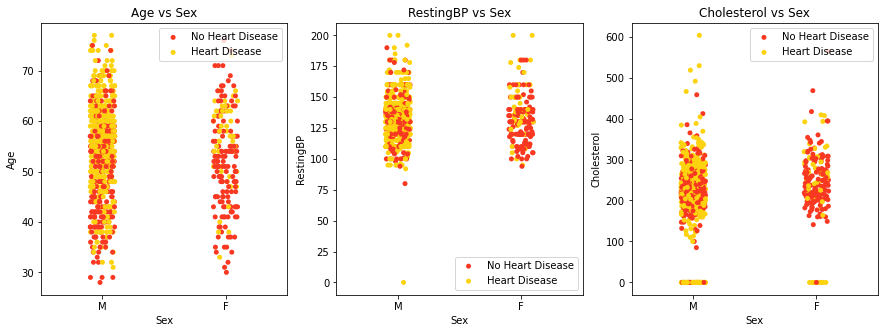

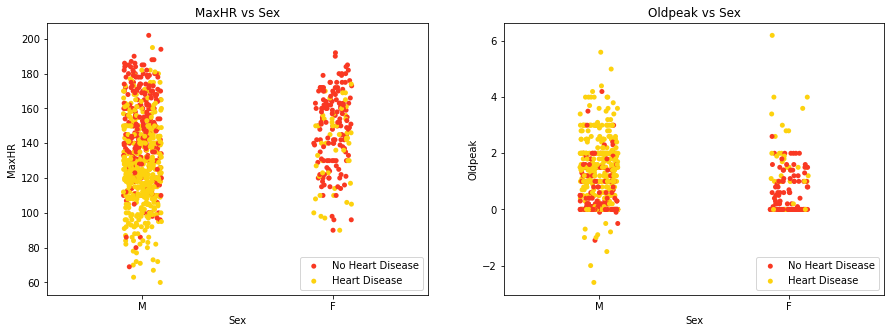

In [21]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sb.stripplot(x = 'Sex', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
for i in [3,4]:
    plt.subplot(1,2,i - 2)
    sb.stripplot(x = 'Sex', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex'
    plt.title(title)

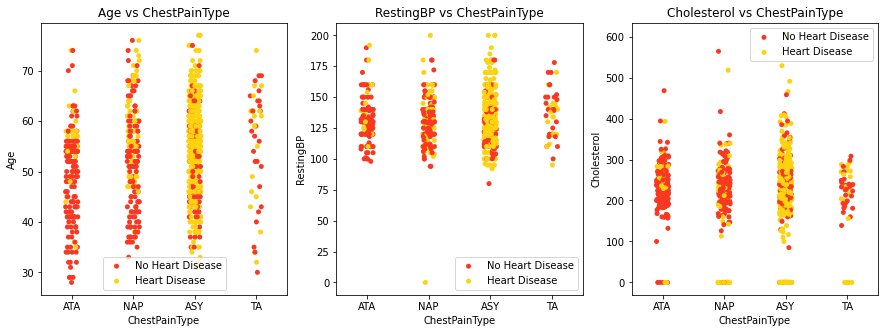

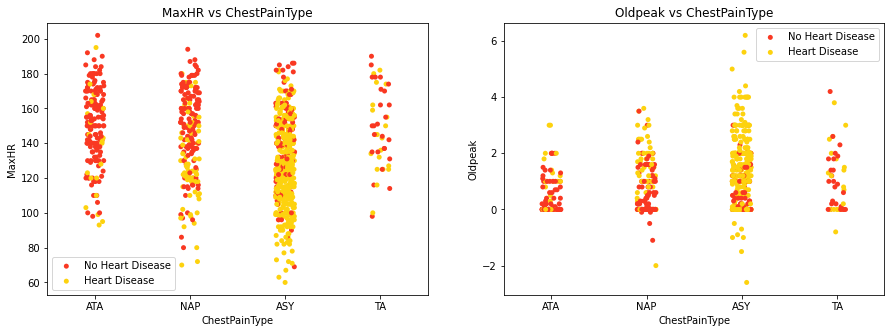

In [22]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sb.stripplot(x = 'ChestPainType', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title)
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
for i in [3,4]:
    plt.subplot(1,2,i - 2)
    sb.stripplot(x = 'ChestPainType', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title)

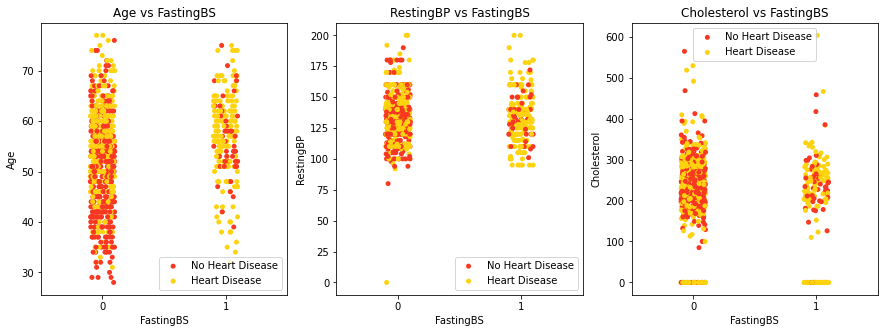

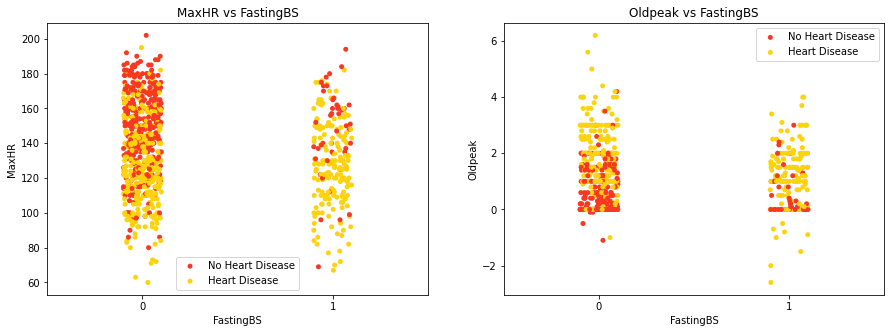

In [23]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sb.stripplot(x = 'FastingBS', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs FastingBS'
    plt.title(title)
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
for i in [3,4]:
    plt.subplot(1,2,i - 2)
    sb.stripplot(x = 'FastingBS', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs FastingBS'
    plt.title(title)

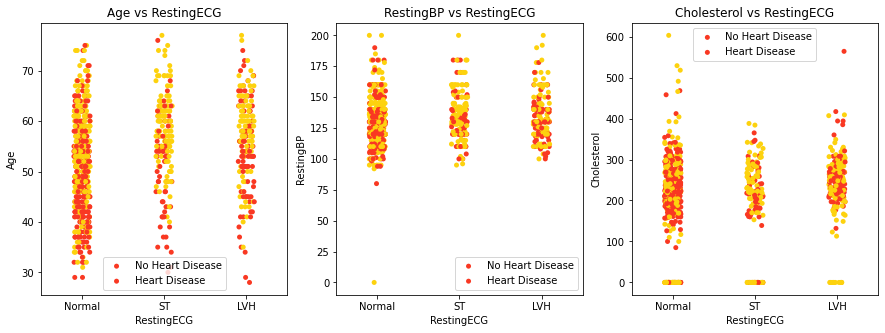

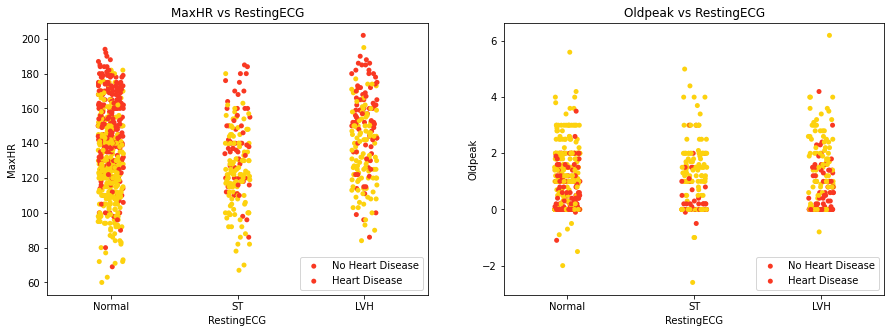

In [24]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sb.stripplot(x = 'RestingECG', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title)
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
for i in [3,4]:
    plt.subplot(1,2,i - 2)
    sb.stripplot(x = 'RestingECG', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG'
    plt.title(title)

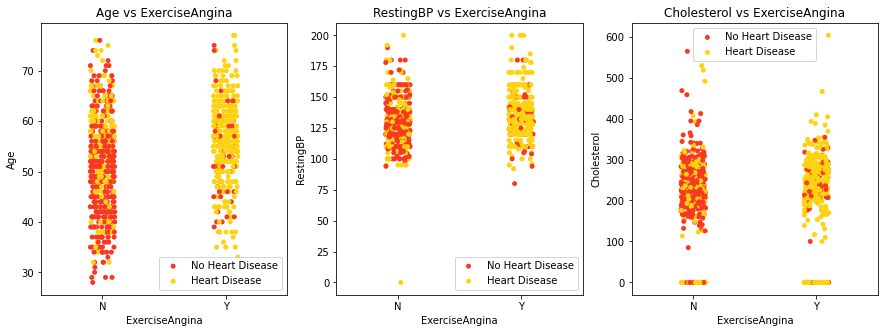

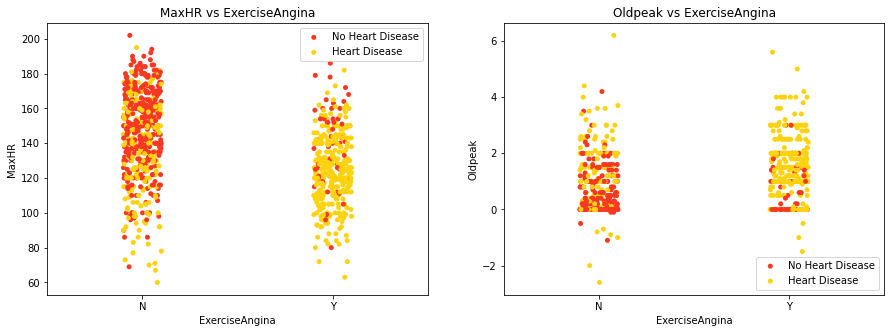

In [25]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sb.stripplot(x = 'ExerciseAngina', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title)
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
for i in [3,4]:
    plt.subplot(1,2,i - 2)
    sb.stripplot(x = 'ExerciseAngina', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title)

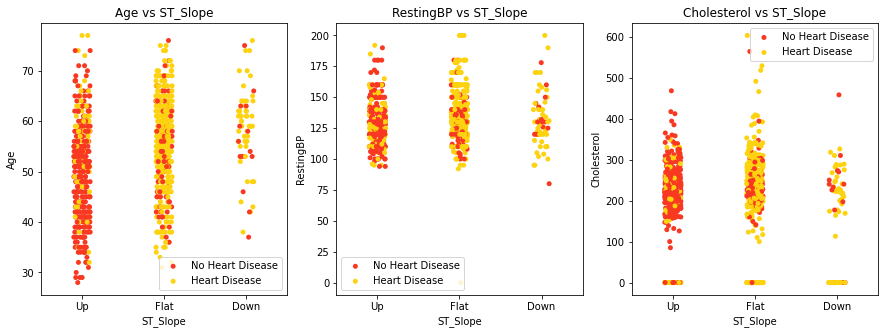

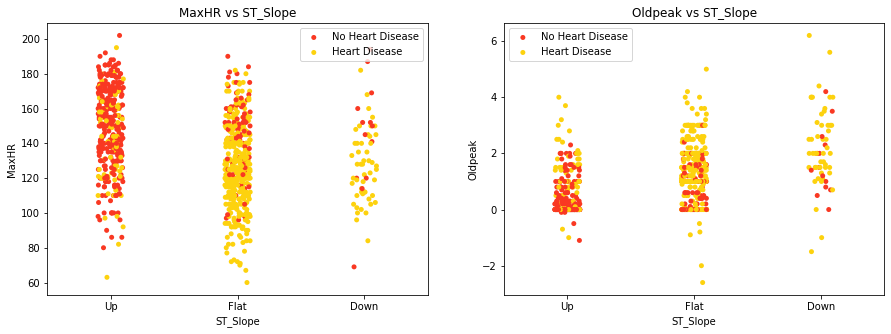

In [26]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    sb.stripplot(x = 'ST_Slope', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title)
    
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
for i in [3,4]:
    plt.subplot(1,2,i - 2)
    sb.stripplot(x = 'ST_Slope', y = numerical_features[i], data = data, hue = 'HeartDisease', palette = colors);
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope'
    plt.title(title)

### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) 

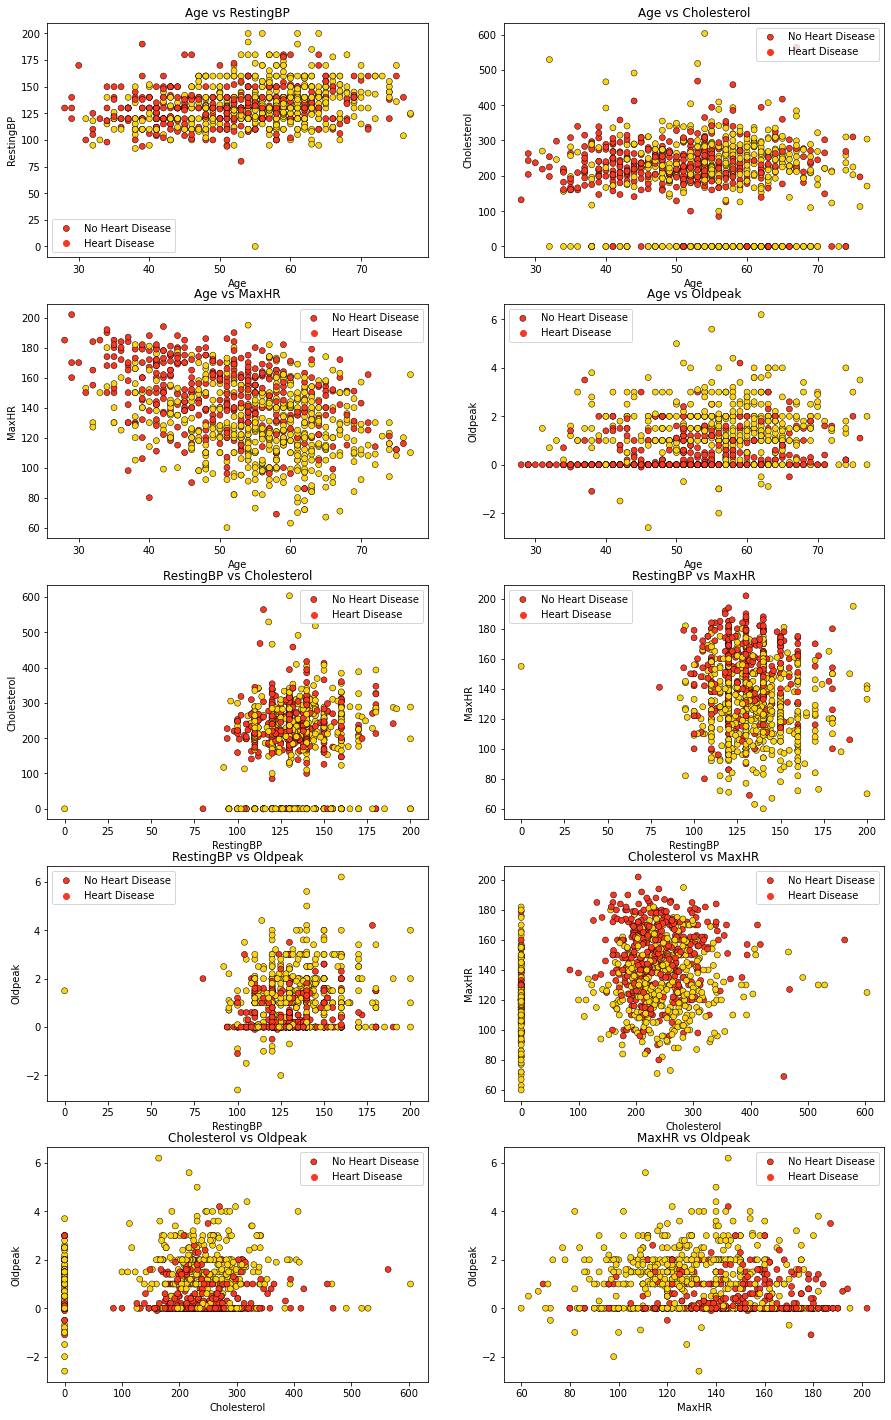

In [27]:
a = 0
fig,ax = plt.subplots(nrows = 5,ncols = 2,figsize = (15,25))
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        if i != j and j > i:
            a += 1
            plt.subplot(5,2,a)
            sb.scatterplot(x = numerical_features[i],y = numerical_features[j],data = data,hue = 'HeartDisease',palette = colors, edgecolor = 'black');
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)

##### For age 50+, RestingBP between 100 - 175, Cholesterol level of 200 - 300,Max Heart Rate below 160 and positive oldpeak values displays high cases of heart disease.
##### For RestingBP values 100 - 175, highlights too many heart disease patients for all the features.
##### Cholesterol values 200 - 300 dominates the heart disease cases.
##### Similarly, Max Heart Rate values below 140 has high probability of being diagnosed with heart diseases.

###                                                               Summary of EDA

#### Order / Values of features for positive cases of heart disease :

##### Categorical Features (Order) :

##### Sex : Male > Female
##### ChestPainType : ASY > NAP > ATA > TA
##### FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
##### RestingECG : Normal > ST > LVH
##### ExerciseAngina : Angina > No Angina
##### ST_Slope : Flat > Up > Down

##### Numerical Features (Range) :

##### Age : 50+
##### RestingBP : 95 - 170
##### Cholesterol : 160 - 340
##### MaxHR : 70 - 180
##### Oldpeak : 0 - 4
Now that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!

In [28]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
mms = MinMaxScaler()
ss = StandardScaler()

df['Oldpeak'] = mms.fit_transform(df[['Oldpeak']])
df['Age'] = ss.fit_transform(df[['Age']])
df['RestingBP'] = ss.fit_transform(df[['RestingBP']])
df['Cholesetrol'] = ss.fit_transform(df[['Cholesterol']])
df['MaxHR'] = ss.fit_transform(df[['MaxHR']])

In [29]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesetrol
0,-1.433140,1,1,0.410909,289,0,1,1.382928,0,0.295455,2,0,0.825070
1,-0.478484,0,2,1.491752,180,0,1,0.754157,0,0.409091,1,1,-0.171961
2,-1.751359,1,1,-0.129513,283,0,2,-1.525138,0,0.295455,2,0,0.770188
3,-0.584556,0,0,0.302825,214,0,1,-1.132156,1,0.465909,1,1,0.139040
4,0.051881,1,2,0.951331,195,0,1,-0.581981,0,0.295455,2,0,-0.034755


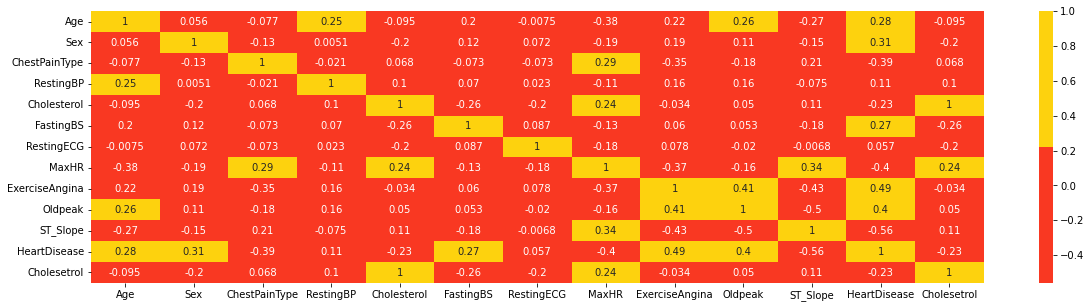

In [30]:
plt.figure(figsize = (20,5))
sb.heatmap(df.corr(),cmap = colors,annot = True);

It is a huge matrix with too many features. We will check the correlation only with respect to HeartDisease.


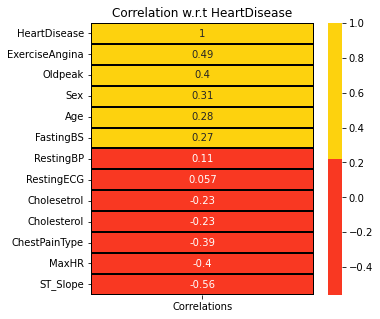

In [31]:
corr = df.corrwith(df['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sb.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
plt.title('Correlation w.r.t HeartDisease');

Feature Selection for Categorical Features :

Chi - Square Test

In [32]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

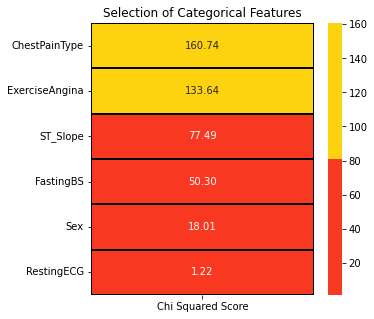

In [33]:
features = df.loc[:,categorical_features[:-1]]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sb.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Except RestingECG, all the remaining categorical features are pretty important for predicting heart diseases.

Feature Selection for Numerical Features :

ANOVA Test 

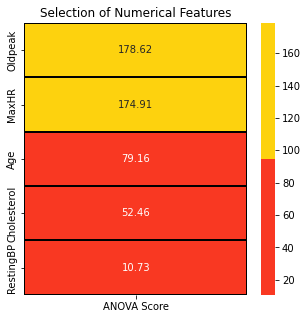

In [36]:
from sklearn.feature_selection import f_classif

features = df.loc[:,numerical_features]
target = df.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sb.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

We will leave out RestingBP from the modeling part and take the remaining features.

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [38]:
features = df[df.columns.drop(['HeartDisease','RestingBP','RestingECG'])].values
target = df['HeartDisease'].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20, random_state = 2)

In [44]:
def model(classifier):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plot_roc_curve(classifier, x_test,y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sb.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

1] Logistic Regression :

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

C:\Users\Saket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Saket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Accuracy :  86.96%


C:\Users\Saket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Saket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Saket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Saket\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Score :  91.09%
ROC_AUC Score :  86.91%


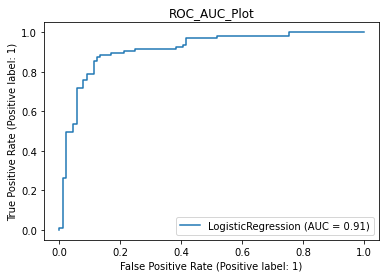

In [42]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        89
           1       0.87      0.88      0.87        95

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



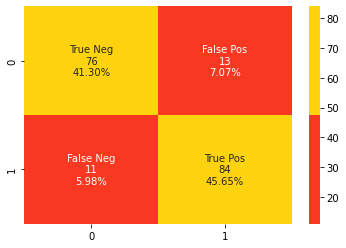

In [45]:
model_evaluation(classifier_lr)

In [46]:
from sklearn.svm import SVC

In [47]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy :  87.50%
Cross Validation Score :  90.57%
ROC_AUC Score :  87.43%


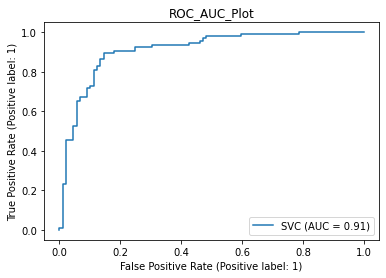

In [48]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



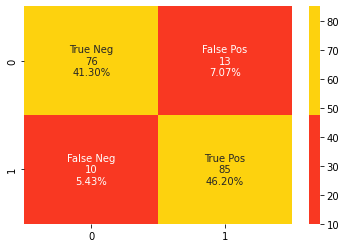

In [49]:
model_evaluation(classifier_svc)

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy :  84.78%
Cross Validation Score :  88.95%
ROC_AUC Score :  84.62%


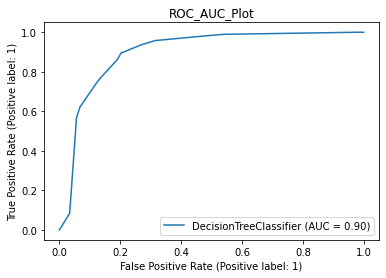

In [52]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



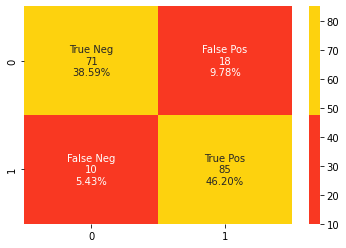

In [53]:
model_evaluation(classifier_dt)

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [55]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  84.24%
Cross Validation Score :  92.96%
ROC_AUC Score :  84.06%


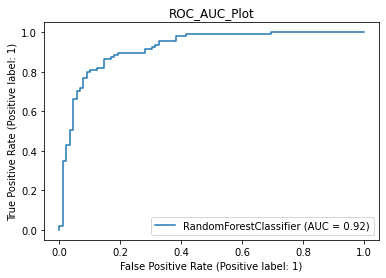

In [56]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



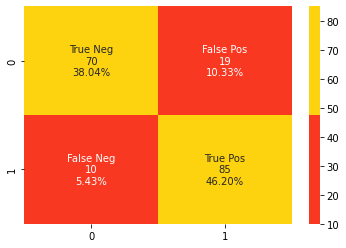

In [57]:
model_evaluation(classifier_rf)

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [59]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy :  78.26%
Cross Validation Score :  83.92%
ROC_AUC Score :  78.17%


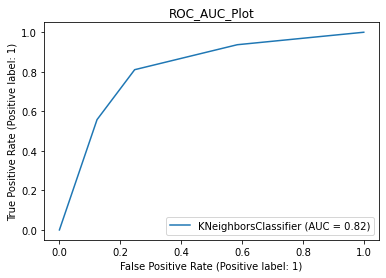

In [60]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.79      0.75      0.77        89
           1       0.78      0.81      0.79        95

    accuracy                           0.78       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.78      0.78      0.78       184



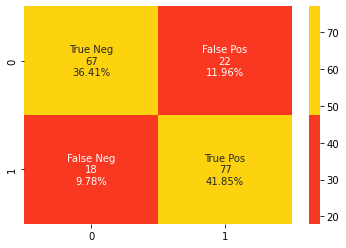

In [61]:
model_evaluation(classifier_knn)